# Movie Recommenders

## Libraries

In [3]:
import shutil
import pandas as pd
import numpy as np

## Data

In [4]:
! wget https://files.grouplens.org/datasets/movielens/ml-20m.zip

--2021-11-22 15:21:53--  https://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  69.8MB/s    in 2.7s    

2021-11-22 15:21:56 (69.8 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [5]:
shutil.unpack_archive("ml-20m.zip")

In [6]:
# Read Movies.csv, Ratings.csv and Tags.csv

movies = pd.read_csv("ml-20m/movies.csv")
ratings = pd.read_csv("ml-20m/ratings.csv")
tags = pd.read_csv("ml-20m/tags.csv")

In [7]:
movies = movies.sort_values('movieId')
ratings = ratings.sort_values('movieId')
tags = tags.sort_values('movieId')

In [8]:
movies = movies.head(1000)
ratings = ratings.head(100000)
tags = tags.head(10000)

In [245]:
movies.loc[:,['movieId', 'title']]

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
995,1014,Pollyanna (1960)
996,1015,Homeward Bound: The Incredible Journey (1993)
997,1016,"Shaggy Dog, The (1959)"
998,1017,Swiss Family Robinson (1960)


In [246]:
# function to split genres into rows 
genres = pd.DataFrame(movies['genres'].str.split('|'))
genres = genres.explode('genres')
genres.head(5)

,genres
0,Adventure
0,Animation
0,Children
0,Comedy
0,Fantasy


In [247]:
genres = pd.get_dummies(data=genres, columns=['genres'], prefix="", prefix_sep="")
genres.reset_index(level=0, inplace=True)

In [248]:
genres = genres.groupby('index').sum()

In [249]:
genres

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
996,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [250]:
# complete movies data

#movies = pd.concat([movies, genres], axis=1)

In [251]:
movies.head(5)

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [336]:
ratings.head(5)

,userId,movieId,rating,timestamp
14162882,97809,1,3.0,1213159631
15347420,106140,1,5.0,1359430429
15347355,106138,1,3.0,1028130533
10170195,70354,1,4.5,1297623340
10170255,70355,1,3.5,1201366614


In [253]:
tags.head(5)

,userId,movieId,tag,timestamp
358938,110148,1,friendship,1422605756
42994,10616,1,animation,1277357417
42993,10616,1,animated,1277357419
42992,10616,1,adventure,1277357423
134542,35984,1,animation,1152405430


In [254]:
print(movies.shape)
print(ratings.shape)
print(tags.shape)

(1000, 22)
(10000, 4)
(10000, 4)


In [255]:
# grouping movies in tag database
movie_tag = tags.loc[:,['movieId','tag']]

In [256]:
movie_tag

,movieId,tag
358938,1,friendship
42994,1,animation
42993,1,animated
42992,1,adventure
134542,1,animation
...,...,...
129778,175,controversial
229899,175,Larry Clark
291621,175,teen
291619,175,drugs


In [257]:
def float_to_str(col):
  return str(col)

In [258]:
movie_tag.movieId = movie_tag.movieId.apply(float_to_str)

In [259]:
movie_tag.dtypes

movieId    object
tag        object
dtype: object

In [260]:
movie_tag['tag'] = movie_tag['tag'].fillna(value="no_tag")

In [261]:
movie_tag_grouped = movie_tag.groupby("movieId")

In [262]:
movie_tag_grouped

In [263]:
grouped_lists = movie_tag_grouped['tag'].agg(lambda column: '|'.join(column))

In [264]:
grouped_lists = grouped_lists.reset_index(name="tag")

In [265]:
grouped_lists

,movieId,tag
0,1,friendship|animation|animated|adventure|animat...
1,10,espionage|funny|good dialogue|one-liners|James...
2,100,Harold Becker|own|Al Pacino|Al Pacino|politics...
3,101,Wes Anderson|off-beat comedy|Wes Anderson|Luke...
4,102,stupid|one of the worst ever|Nick Castle
...,...,...
150,94,Natalie Portman|friendship relations|Natalie P...
151,95,John Woo|action|nuclear bomb|park ranger|R|Uta...
152,96,theater|Kenneth Branagh
153,97,3.5|social commentary|angry|black and white|bl...


In [266]:
def str_to_int(x):
  return int(x)

In [267]:
grouped_lists.movieId = grouped_lists.movieId.apply(str_to_int)

In [268]:
grouped_lists

,movieId,tag
0,1,friendship|animation|animated|adventure|animat...
1,10,espionage|funny|good dialogue|one-liners|James...
2,100,Harold Becker|own|Al Pacino|Al Pacino|politics...
3,101,Wes Anderson|off-beat comedy|Wes Anderson|Luke...
4,102,stupid|one of the worst ever|Nick Castle
...,...,...
150,94,Natalie Portman|friendship relations|Natalie P...
151,95,John Woo|action|nuclear bomb|park ranger|R|Uta...
152,96,theater|Kenneth Branagh
153,97,3.5|social commentary|angry|black and white|bl...


### Merging movies and tags

In [280]:
movies.shape

(1000, 3)

In [281]:
# joining all tag field for each movie_title

tags_movies = pd.merge(left=movies, right=grouped_lists, on='movieId', how='left')

In [282]:
tags_movies.shape

(1000, 4)

In [283]:
tags_movies.head(5)

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,friendship|animation|animated|adventure|animat...
1,2,Jumanji (1995),Adventure|Children|Fantasy,time travel|Robin Williams|game|board game|Kir...
2,3,Grumpier Old Men (1995),Comedy|Romance,comedinha de velhinhos engraÃƒÂ§ada|Jack Lemmo...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,characters|CLV|revenge|chick flick|chick flick...
4,5,Father of the Bride Part II (1995),Comedy,CLV|wedding|watched under duress|Comedy|it tho...


### Content filtering method on metadata

In [284]:
"""
Prepare and Explore the dataset
"""
# Find out how many tags in each movieId
tags_movies['movieId'].value_counts(dropna=False)

1018    1
332     1
345     1
344     1
343     1
       ..
670     1
668     1
667     1
666     1
1       1
Name: movieId, Length: 1000, dtype: int64

In [285]:
tags_movies[tags_movies['movieId'] == 296]

,movieId,title,genres,tag
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,NaN


In [286]:
# Collect a specific movie data
data_movie = tags_movies.loc[tags_movies['movieId'] == 296]

In [287]:
data_movie.head(5)

,movieId,title,genres,tag
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,NaN


In [288]:
tags_movies.head(5)

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,friendship|animation|animated|adventure|animat...
1,2,Jumanji (1995),Adventure|Children|Fantasy,time travel|Robin Williams|game|board game|Kir...
2,3,Grumpier Old Men (1995),Comedy|Romance,comedinha de velhinhos engraÃƒÂ§ada|Jack Lemmo...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,characters|CLV|revenge|chick flick|chick flick...
4,5,Father of the Bride Part II (1995),Comedy,CLV|wedding|watched under duress|Comedy|it tho...


In [289]:
tags_movies['tag'].nunique()

154

In [29]:
#tags_movies.drop(labels=['userId', 'timestamp'], inplace=True, axis=1)

In [169]:
#tags_movies.head(5)

In [290]:
tags_movies.shape

(1000, 4)

In [32]:
#tags_dummy = pd.get_dummies(data=tags_movies['tag'][1:100], prefix="", prefix_sep="")

In [33]:
#tags_dummy.head(5)

,Can't remember,Dennis Hopper,Freddie Prinze Jr.,Friday night movie,Futuristmovies.com,Kevin Costner,Mark Waters,Post apocalyptic,SF,Too Long!,adventure,alone in the world,apocalypse,better than everybody thinks,big budget,dark hero,dystopia,dystopic future,futuristic,gyrocopter,horrible,kevin costner,naive,ocean,post apocalypse,post-apocalyptic,sci-fi,search,steampunk,stupid,survival,water,x-mas movie
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#def assign_metadata(x_row):

#  for i in range(x_row.shape[0]):
#    x_row.iloc[i,:] = x_row.iloc[i,:].replace({0: " ", 1: x_row.loc[:,x_row.iloc[i,:] == 1].columns[0]})

In [35]:
#assign_metadata(tags_dummy)

In [36]:
#tags_movies = pd.concat([tags_movies[1:100], tags_dummy], axis=1)

In [37]:
#tags_movies.head(5)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tag,metadata,Can't remember,Dennis Hopper,Freddie Prinze Jr.,Friday night movie,Futuristmovies.com,Kevin Costner,Mark Waters,Post apocalyptic,SF,Too Long!,adventure,alone in the world,apocalypse,better than everybody thinks,big budget,dark hero,dystopia,dystopic future,futuristic,gyrocopter,horrible,kevin costner,naive,ocean,post apocalypse,post-apocalyptic,sci-fi,search,steampunk,stupid,survival,water,x-mas movie
1,4141,Head Over Heels (2001),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,naive,,,,,,,,,,,,,,,,,,,,,,,,naive,,,,,,,,,,
2,4141,Head Over Heels (2001),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Mark Waters,,,,,,,,Mark Waters,,,,,,,,,,,,,,,,,,,,,,,,,,
3,4141,Head Over Heels (2001),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Freddie Prinze Jr.,,,,Freddie Prinze Jr.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,208,Waterworld (1995),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,dark hero,,,,,,,,,,,,,,,,,dark hero,,,,,,,,,,,,,,,,,
5,208,Waterworld (1995),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Kevin Costner,,,,,,,Kevin Costner,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [43]:
#tags_movies['full_metadata'] = tags_movies.iloc[:,25:].apply(lambda x: ' '.join(x), axis = 1)

In [52]:
#tags_movies[['dystopia','dystopic future']].apply(lambda x: ' '.join(x), axis = 1)  

1        
2        
3        
4        
5        
     ... 
95       
96       
97       
98       
99       
Length: 99, dtype: object

In [51]:
#tags_movies['full_metadata'].iloc[1]

'                                            naive                    '

In [291]:
tags_movies

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,friendship|animation|animated|adventure|animat...
1,2,Jumanji (1995),Adventure|Children|Fantasy,time travel|Robin Williams|game|board game|Kir...
2,3,Grumpier Old Men (1995),Comedy|Romance,comedinha de velhinhos engraÃƒÂ§ada|Jack Lemmo...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,characters|CLV|revenge|chick flick|chick flick...
4,5,Father of the Bride Part II (1995),Comedy,CLV|wedding|watched under duress|Comedy|it tho...
...,...,...,...,...
995,1014,Pollyanna (1960),Children|Comedy|Drama,NaN
996,1015,Homeward Bound: The Incredible Journey (1993),Adventure|Children|Drama,NaN
997,1016,"Shaggy Dog, The (1959)",Children|Comedy,NaN
998,1017,Swiss Family Robinson (1960),Adventure|Children,NaN


In [292]:
tags_movies.tag = tags_movies.tag.fillna("(no tags listed)")

In [293]:
tags_movies

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,friendship|animation|animated|adventure|animat...
1,2,Jumanji (1995),Adventure|Children|Fantasy,time travel|Robin Williams|game|board game|Kir...
2,3,Grumpier Old Men (1995),Comedy|Romance,comedinha de velhinhos engraÃƒÂ§ada|Jack Lemmo...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,characters|CLV|revenge|chick flick|chick flick...
4,5,Father of the Bride Part II (1995),Comedy,CLV|wedding|watched under duress|Comedy|it tho...
...,...,...,...,...
995,1014,Pollyanna (1960),Children|Comedy|Drama,(no tags listed)
996,1015,Homeward Bound: The Incredible Journey (1993),Adventure|Children|Drama,(no tags listed)
997,1016,"Shaggy Dog, The (1959)",Children|Comedy,(no tags listed)
998,1017,Swiss Family Robinson (1960),Adventure|Children,(no tags listed)


 ## Tfidf Vectorizer model for Content filter

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(tags_movies['tag'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=tags_movies.index.tolist())
print(tfidf_df.shape)

(1000, 2105)


In [295]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007665,0.0,0.0,0.0,0.0,0.032144,0.0,0.024365,0.0,0.0,0.0,0.007665,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.096392,0.0,0.0,0.0,0.0,0.0,0.0,0.007665,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008122,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.025202,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.116394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## TruncatedSVD for Content filter

In [296]:
tfidf_df = tfidf_df.iloc[:,0:1000]

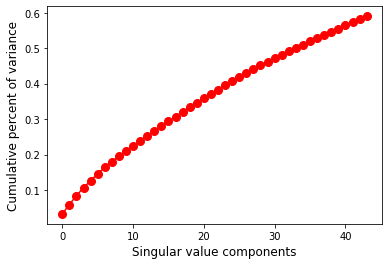

In [297]:
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
svd = TruncatedSVD(n_components=44)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [298]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=tags_movies.title.tolist())

### Pivot table on ratings data

In [311]:
ratings.head(5)

,userId,movieId,rating,timestamp
14162882,97809,1,3.0,1213159631
15347420,106140,1,5.0,1359430429
15347355,106138,1,3.0,1028130533
10170195,70354,1,4.5,1297623340
10170255,70355,1,3.5,1201366614


In [312]:
user_movie_matrix = ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)

In [313]:
user_movie_matrix.shape

(6, 63531)

In [314]:
user_movie_matrix.head(5)

userId,1,2,3,5,6,7,8,10,11,12,13,14,16,19,22,23,24,29,30,31,34,38,39,41,46,47,53,54,58,59,61,66,69,75,80,82,84,88,90,91,...,138410,138411,138412,138415,138416,138419,138422,138423,138424,138426,138428,138430,138431,138432,138436,138437,138439,138441,138443,138445,138446,138448,138454,138456,138459,138464,138467,138471,138472,138473,138474,138477,138480,138481,138483,138484,138486,138488,138491,138493
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,5.0,0.0,4.0,4.0,4.5,4.0,4.0,4.5,3.0,5.0,3.0,4.0,4.0,0.0,0.0,3.0,5.0,0.0,5.0,0.0,0.0,1.0,4.0,4.0,5.0,4.5,0.0,4.0,4.0,0.0,3.0,5.0,5.0,0.0,3.5,4.0,...,4.0,5.0,3.0,4.0,5.0,0.0,4.5,2.0,5.0,0.0,5.0,2.0,5.0,4.0,3.5,4.0,4.0,5.0,3.5,4.0,5.0,5.0,5.0,1.0,2.0,4.0,4.0,4.5,3.0,4.5,5.0,3.0,4.0,4.0,4.0,0.0,5.0,3.0,2.0,3.5
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.5,...,0.0,0.0,0.0,0.0,4.5,3.5,3.5,0.0,3.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0,0.0,4.0
3,0.0,4.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Collab filter on User Movie matrix

In [315]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)

### Latent matrix 2

In [320]:
tags_movies[0:6]

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,friendship|animation|animated|adventure|animat...
1,2,Jumanji (1995),Adventure|Children|Fantasy,time travel|Robin Williams|game|board game|Kir...
2,3,Grumpier Old Men (1995),Comedy|Romance,comedinha de velhinhos engraÃƒÂ§ada|Jack Lemmo...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,characters|CLV|revenge|chick flick|chick flick...
4,5,Father of the Bride Part II (1995),Comedy,CLV|wedding|watched under duress|Comedy|it tho...
5,6,Heat (1995),Action|Crime|Thriller,philosophy|realistic action|tense|suspense|gre...


In [321]:
latent_matrix_2 = svd.fit_transform(user_movie_matrix)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index=tags_movies[0:6].title.tolist())

### Hybrid model

In [322]:
latent_matrix_1_df.shape

(1000, 20)

In [330]:
latent_matrix_1_df[0:6]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Toy Story (1995),0.031621,0.071326,0.118602,-0.028840,0.067133,-0.006961,-0.041313,0.007810,-0.008567,-0.011663,0.010892,0.078935,-0.040517,0.042556,0.018663,0.005062,-0.136269,0.169783,-0.046851,-0.020293
Jumanji (1995),0.135931,0.016616,0.008946,0.007678,0.014886,-0.065579,-0.031444,0.038347,0.046484,-0.036720,0.014111,0.049578,-0.028216,0.053969,0.017392,0.002099,-0.150636,-0.075052,-0.030509,0.134044
Grumpier Old Men (1995),0.029915,0.084347,-0.016499,-0.056666,0.016886,0.009150,0.005471,-0.020225,-0.019559,-0.010402,-0.025211,0.008722,0.006023,0.011392,0.009766,0.002173,-0.034526,-0.018697,-0.021219,-0.007367
Waiting to Exhale (1995),0.248403,0.466152,-0.243092,0.508209,0.023885,-0.400357,-0.018535,0.003069,0.007324,-0.001736,0.043632,-0.009566,0.007326,-0.006302,-0.000010,0.000225,0.006850,0.024467,0.007085,-0.000670
Father of the Bride Part II (1995),0.042107,0.151312,0.188695,-0.026751,0.007464,0.010903,0.011871,-0.016986,-0.012351,-0.004809,-0.014318,0.003523,0.004692,0.008040,0.007020,0.001192,-0.028274,-0.018021,-0.018659,-0.000580
Heat (1995),0.042706,0.058965,-0.015846,-0.068526,0.020124,0.006723,-0.099959,0.043154,0.039475,-0.036948,-0.077615,0.186705,-0.164848,-0.115439,-0.020299,-0.003156,0.142597,-0.012389,0.009879,0.074460


In [324]:
latent_matrix_2_df

,0,1,2,3,4,5
Toy Story (1995),881.744213,-158.635864,-27.441476,0.450868,0.024301,-0.260148
Jumanji (1995),268.342502,384.159797,-172.855525,-9.991002,-5.757665,-0.220430
Grumpier Old Men (1995),147.680263,125.169879,266.189570,-176.028381,-5.501930,-0.376866
Waiting to Exhale (1995),24.282932,27.164439,17.856784,6.929882,155.492857,-0.126483
Father of the Bride Part II (1995),138.756411,127.119143,222.196192,202.609674,-10.381961,-0.139186
Heat (1995),4.620092,1.407963,1.112400,-0.495909,0.187613,79.343581


In [332]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df[0:6].loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df[0:6], a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
# dictDf = {'collaborative': score_2} 
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Father of the Bride Part II (1995),0.499856,0.302354,0.401105
Grumpier Old Men (1995),0.299031,0.307764,0.303397
Jumanji (1995),0.277835,0.402873,0.340354
Heat (1995),0.030248,0.053314,0.041781
Waiting to Exhale (1995),0.018633,0.115272,0.066952


## Matrix Factorization Recommender

In [334]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [337]:
ratings

,userId,movieId,rating,timestamp
14162882,97809,1,3.0,1213159631
15347420,106140,1,5.0,1359430429
15347355,106138,1,3.0,1028130533
10170195,70354,1,4.5,1297623340
10170255,70355,1,3.5,1201366614
...,...,...,...,...
9720553,67236,6,5.0,831714633
7739212,53333,6,4.0,1229255118
395287,2702,6,4.5,1378562228
18960500,131227,6,3.5,1059766525


In [338]:
R= np.array(ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0))

In [339]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 288.2391
Iteration: 40 ; error = 276.7066
Iteration: 60 ; error = 242.3887
Iteration: 80 ; error = 188.2283
Iteration: 100 ; error = 141.0262

P x Q:
[[3.99992579 3.45115445 3.45763108 3.20236739 3.2137549  3.8827936 ]
 [4.13325508 3.56462719 3.7025434  3.31888077 3.30972445 3.83904147]
 [3.88537288 3.38598897 3.54602303 2.88678393 3.25409906 3.81609312]
 ...
 [3.41931171 2.89014005 2.9048725  2.81715594 2.57027147 3.74507852]
 [3.03360138 2.46624467 2.41931408 2.06322885 2.25099479 3.70216769]
 [3.72239282 3.69728616 3.38760654 2.79298994 3.13826447 3.79747341]]



## Popularity

In [2]:
!pip install turicreate

     |████████████████████████████████| 92.0 MB 6.0 kB/s 
     |████████████████████████████████| 322 kB 51.2 MB/s 
     |████████████████████████████████| 86.4 MB 19 kB/s 
     |████████████████████████████████| 3.5 MB 41.7 MB/s 
     |████████████████████████████████| 3.6 MB 59.0 MB/s 
     |████████████████████████████████| 18.3 MB 1.3 MB/s 
     |████████████████████████████████| 449 kB 59.4 MB/s 
     |████████████████████████████████| 3.8 MB 73.8 MB/s 
     |████████████████████████████████| 50 kB 2.2 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 2.9 MB 68.7 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=5915a040be1c019edb6157527576296648a0bc2f2ef97e9ee8cd5766fc942b8c
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=7dfb441a1c

In [1]:
import turicreate

In [12]:
ratings_train = ratings.iloc[0:70000,:]
ratings_test = ratings.iloc[70001:,:]

In [13]:
train_data = turicreate.SFrame(ratings_train)

In [14]:
test_data = turicreate.SFrame(ratings_test)

In [15]:
test_data

userId,movieId,rating,timestamp
76881,2,3.0,842086051
103675,2,2.5,1231554823
102888,2,3.0,944982303
36708,2,4.0,839510315
103668,2,3.5,1151965035
103676,2,3.0,1114306834
75290,2,3.0,847378079
5768,2,2.5,1224754533
20449,2,4.0,841248407
128543,2,3.0,1219813215


In [16]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='userId', item_id='movieId', target='rating')

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 70000 observations with 56967 users and 2 items.

Data prepared in: 0.102591s

70000 observations to process; with 2 unique items.

### Recommend some movies to users 1, 2, 3, 4, 5

In [17]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+--------+---------+--------------------+------+
| userId | movieId |       score        | rank |
+--------+---------+--------------------+------+
|   1    |    1    | 3.921239561324077  |  1   |
|   2    |    1    | 3.921239561324077  |  1   |
|   2    |    2    | 3.2132233440039397 |  2   |
|   3    |    2    | 3.2132233440039397 |  1   |
|   4    |    1    | 3.921239561324077  |  1   |
|   4    |    2    | 3.2132233440039397 |  2   |
|   5    |    1    | 3.921239561324077  |  1   |
+--------+---------+--------------------+------+
[7 rows x 4 columns]

